<a href="https://colab.research.google.com/github/Benylaode/Clustering-And-Klasifiktion-/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Laode_Fahmi_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [950]:
pip install kagglehub

In [951]:
pip install category_encoders

In [952]:
pip install squarify

In [953]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import kagglehub
import numpy as np
from scipy.stats import f_oneway
import squarify
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from category_encoders import HashingEncoder
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.datasets import make_blobs

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [954]:
path = kagglehub.dataset_download("bhargavchirumamilla/netflix-movies-and-tv-shows-till-2025")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/netflix_movies_detailed_up_to_2025.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/bhargavchirumamilla/netflix-movies-and-tv-shows-till-2025/versions/1


In [955]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [956]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [957]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [958]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [959]:
print(df["director"].unique())

['Mike Mitchell' 'Christopher Nolan' 'David Yates' ...
 'Angel Nichole Bradford, Steve Hermann' 'Daniel Kowal' 'Woody Bess']


In [960]:
print(f"type : {df['type'].unique()}")
print(f"director : {df['director'].unique()}")
print(f"cast : {df['cast'].unique()}")
print(f"country : {df['country'].unique()}")
print(f"language : {df['language'].unique()}")
print(f"rating : {df['rating'].unique()}")
print(f"budget : {df['budget'].unique()}")
print(f"revenue : {df['revenue'].unique()}")

type : ['Movie']
director : ['Mike Mitchell' 'Christopher Nolan' 'David Yates' ...
 'Angel Nichole Bradford, Steve Hermann' 'Daniel Kowal' 'Woody Bess']
cast : ['Mike Myers, Eddie Murphy, Cameron Diaz, Antonio Banderas, Walt Dohrn'
 'Leonardo DiCaprio, Joseph Gordon-Levitt, Ken Watanabe, Tom Hardy, Elliot Page'
 'Daniel Radcliffe, Emma Watson, Rupert Grint, Toby Jones, Helena Bonham Carter'
 ...
 'Jessa Flux, Lynn Lowry, Angel Nichole Bradford, Melissa Heflin, Anna Clary'
 'Riley G, Mitchel Corrado'
 "Trey Holland, Keith David, Richard Kind, Michael McDonald, Romina D'Ugo"]
country : ['United States of America' 'United Kingdom, United States of America'
 'China, Hong Kong, United States of America' ... 'Norway, Romania'
 'Indonesia, United Kingdom, United States of America'
 'Germany, Saudi Arabia, Qatar, France, Greece, Netherlands, United Kingdom, Palestinian Territory']
language : ['en' 'es' 'sr' 'pt' 'ko' 'fr' 'hi' 'ja' 'th' 'no' 'de' 'zh' 'it' 'fi'
 'cn' 'sv' 'is' 'ta' 'nl' 'da' '

<ipython-input-961-8f1aced1c1af>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


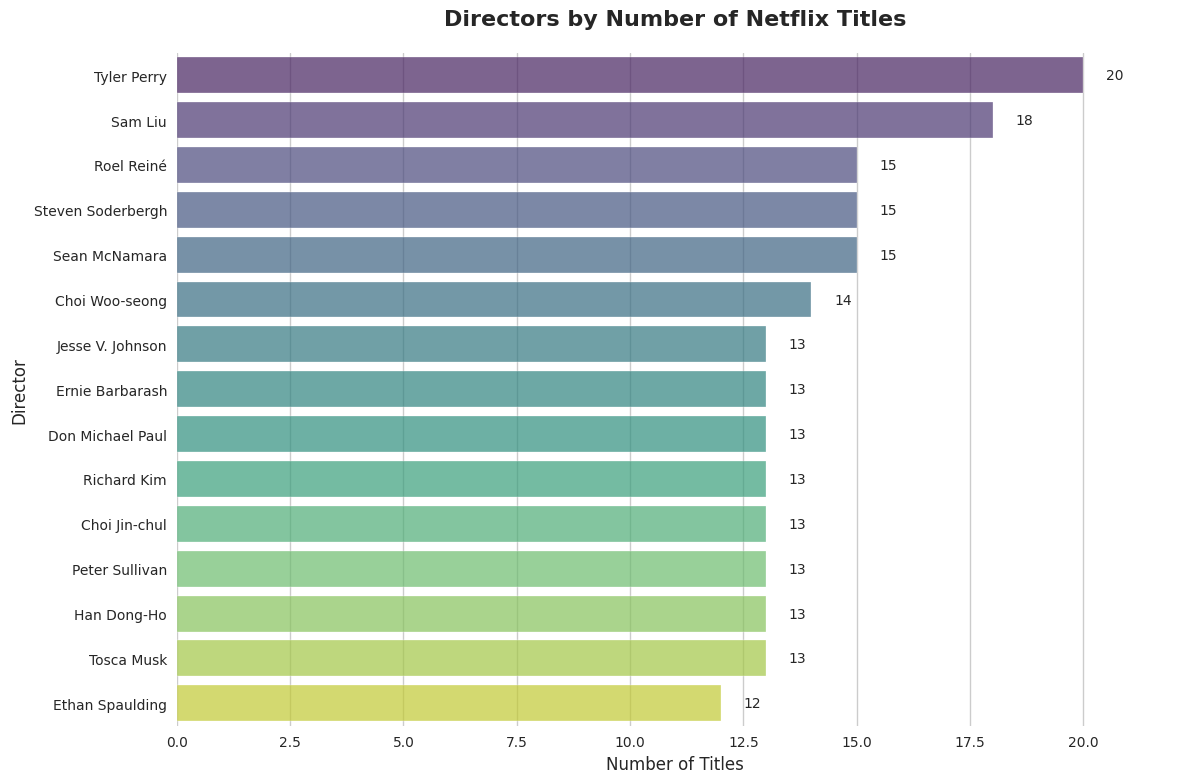

In [961]:
df['director'] = df['director'].str.split(', ')
df = df.explode('director')
top_n = 15
director_counts = df['director'].value_counts().head(top_n).reset_index()
director_counts.columns = ['Director', 'Count']

director_counts = director_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x='Count',
    y='Director',
    data=director_counts,
    palette='viridis',
    alpha=0.7
)

for i, (value, name) in enumerate(zip(director_counts['Count'], director_counts['Director'])):
    bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'Directors by Number of Netflix Titles',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xlim(0, director_counts['Count'].max() * 1.1)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-962-8987541290a7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


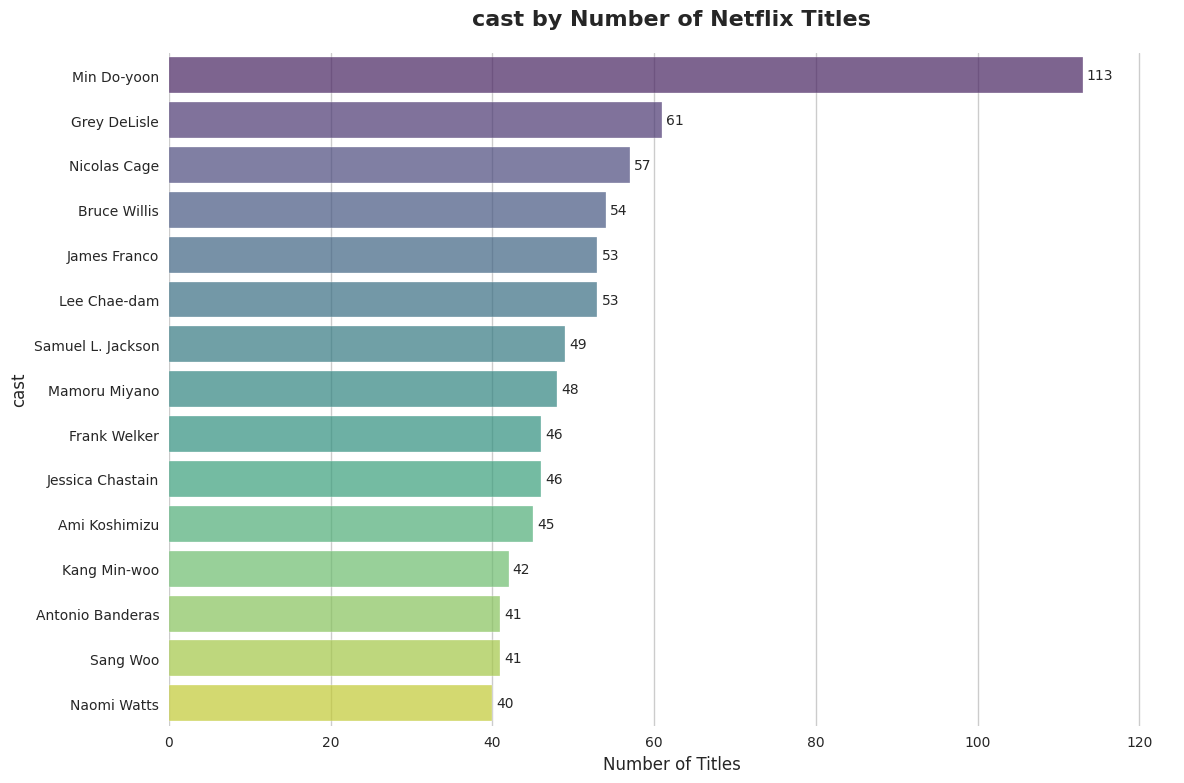

In [962]:
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')
top_n = 15
director_counts = df['cast'].value_counts().head(top_n).reset_index()
director_counts.columns = ['cast', 'Count']

director_counts = director_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x='Count',
    y='cast',
    data=director_counts,
    palette='viridis',
    alpha=0.7
)

for i, (value, name) in enumerate(zip(director_counts['Count'], director_counts['cast'])):
    bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'cast by Number of Netflix Titles',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('cast', fontsize=12)
plt.xlim(0, director_counts['Count'].max() * 1.1)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-963-e252a46f1f4f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


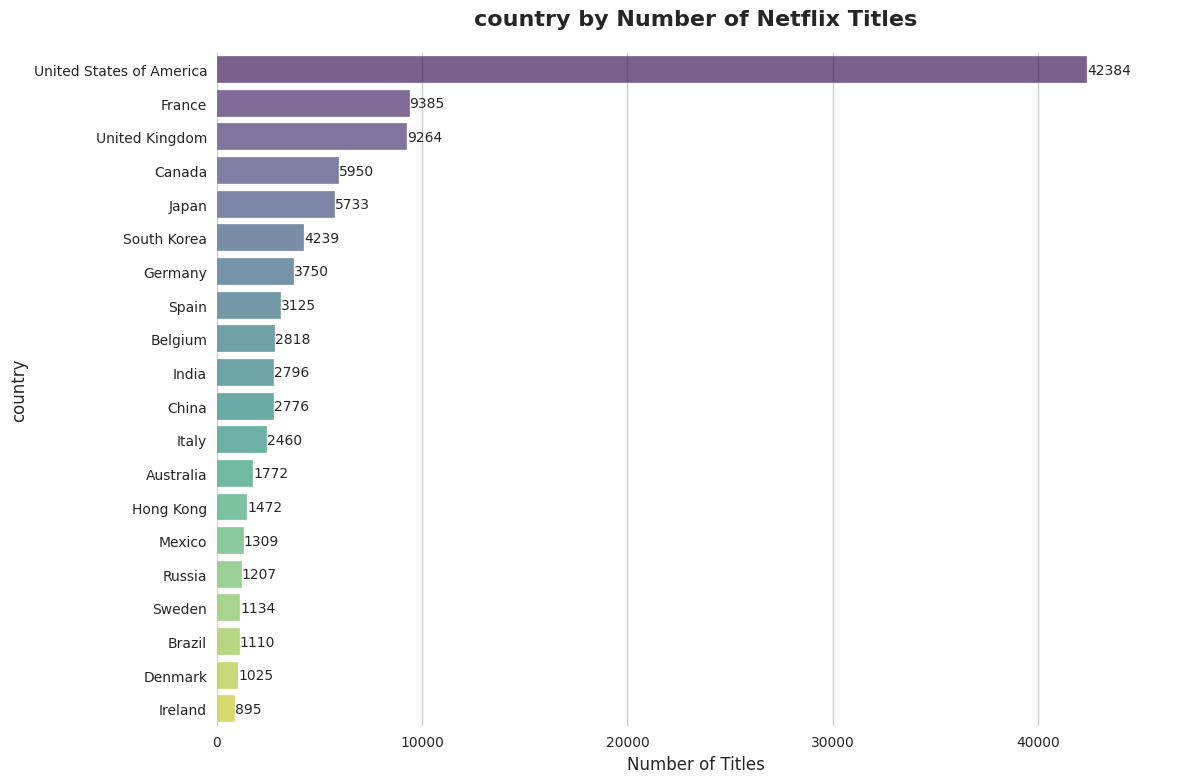

In [963]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country')
top_n = 20
director_counts = df['country'].value_counts().head(top_n).reset_index()
director_counts.columns = ['country', 'Count']

director_counts = director_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x='Count',
    y='country',
    data=director_counts,
    palette='viridis',
    alpha=0.7
)

for i, (value, name) in enumerate(zip(director_counts['Count'], director_counts['country'])):
    bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'country by Number of Netflix Titles',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('country', fontsize=12)
plt.xlim(0, director_counts['Count'].max() * 1.1)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-964-d442089c3148>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


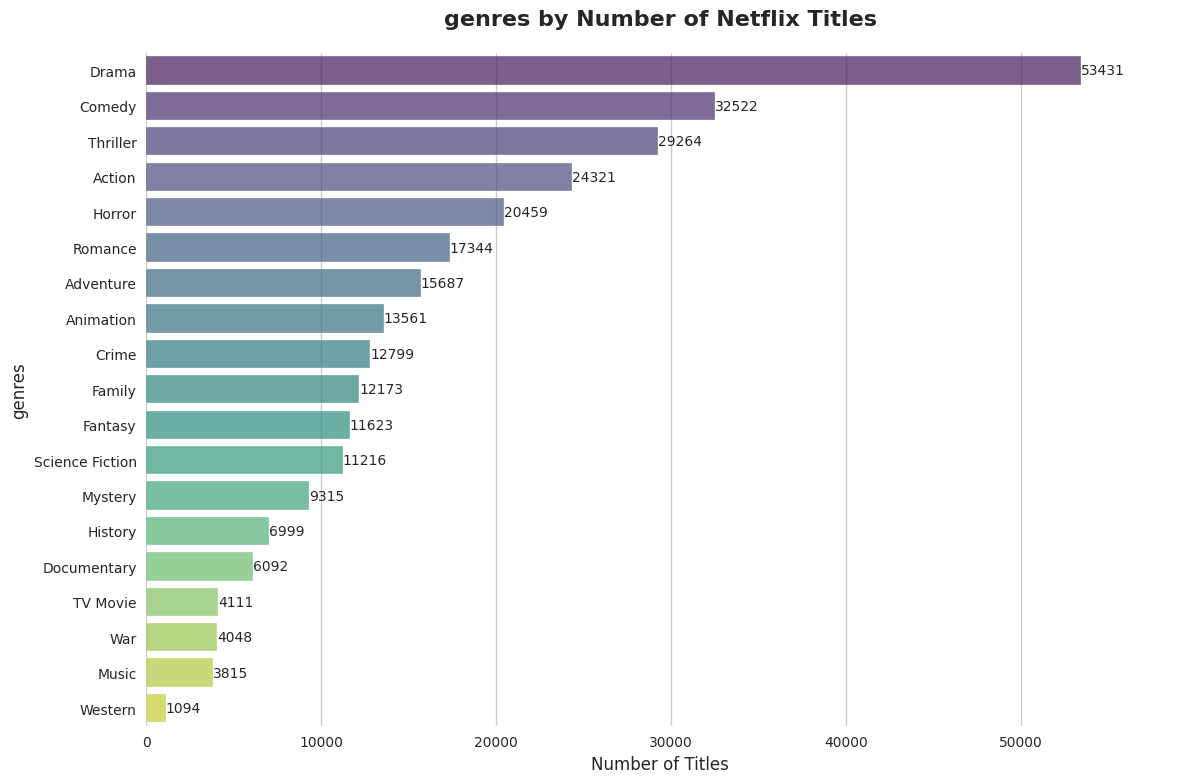

In [964]:
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')
top_n = 20
director_counts = df['genres'].value_counts().head(top_n).reset_index()
director_counts.columns = ['genres', 'Count']

director_counts = director_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x='Count',
    y='genres',
    data=director_counts,
    palette='viridis',
    alpha=0.7
)

for i, (value, name) in enumerate(zip(director_counts['Count'], director_counts['genres'])):
    bar_plot.text(value + 0.5, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'genres by Number of Netflix Titles',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('genres', fontsize=12)
plt.xlim(0, director_counts['Count'].max() * 1.1)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-965-bd2127649599>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1200x1000 with 0 Axes>

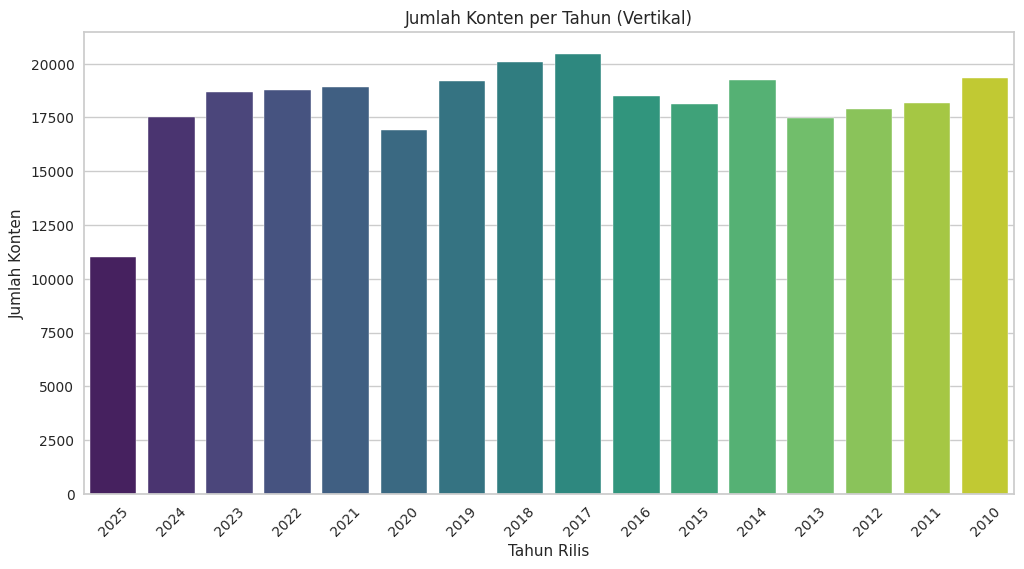

In [965]:
release_year_counts = df['release_year'].value_counts().sort_index(ascending=False)

threshold = 1
filtered_counts = release_year_counts[release_year_counts >= threshold]

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    x=filtered_counts.index.astype(str),
    y=filtered_counts.values,
    palette='viridis'
)
plt.title('Jumlah Konten per Tahun (Vertikal)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

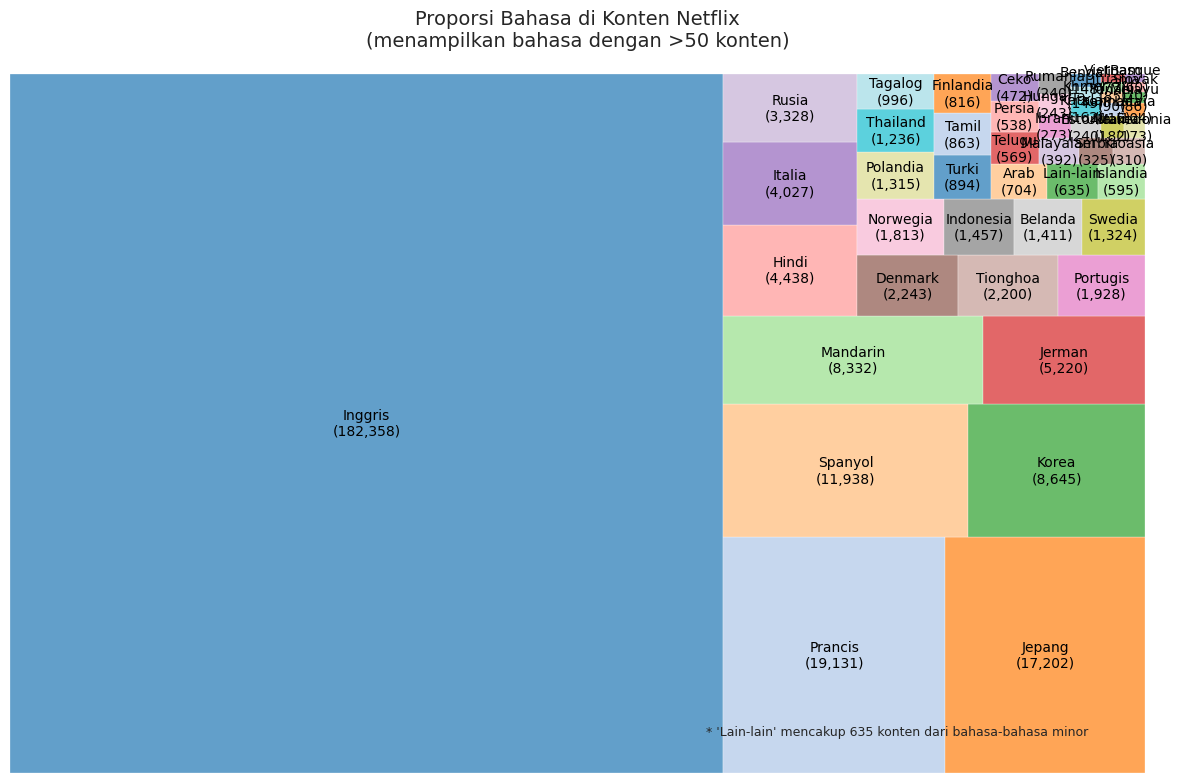

In [966]:

language_counts = df['language'].value_counts()

language_names_id = {
    'en': 'Inggris',
    'es': 'Spanyol',
    'sr': 'Serbia',
    'pt': 'Portugis',
    'ko': 'Korea',
    'fr': 'Prancis',
    'hi': 'Hindi',
    'ja': 'Jepang',
    'th': 'Thailand',
    'no': 'Norwegia',
    'de': 'Jerman',
    'zh': 'Mandarin',
    'it': 'Italia',
    'fi': 'Finlandia',
    'cn': 'Tionghoa',
    'sv': 'Swedia',
    'is': 'Islandia',
    'ta': 'Tamil',
    'nl': 'Belanda',
    'da': 'Denmark',
    'ru': 'Rusia',
    'tr': 'Turki',
    'el': 'Yunani',
    'te': 'Telugu',
    'bn': 'Bengali',
    'ar': 'Arab',
    'ca': 'Katalan',
    'fa': 'Persia',
    'ro': 'Rumania',
    'he': 'Ibrani',
    'cs': 'Ceko',
    'hu': 'Hungaria',
    'pl': 'Polandia',
    'ml': 'Malayalam',
    'ms': 'Melayu',
    'id': 'Indonesia',
    'ku': 'Kurdi',
    'xx': 'Tidak Diketahui',
    'tl': 'Tagalog',
    'gl': 'Galicia',
    'lt': 'Lituania',
    'si': 'Sinhala',
    'et': 'Estonia',
    'hr': 'Kroasia',
    'ps': 'Pashto',
    'mi': 'Maori',
    'uk': 'Ukraina',
    'af': 'Afrikaans',
    'km': 'Khmer',
    'mr': 'Marathi',
    'sk': 'Slovak',
    'kn': 'Kannada',
    'eu': 'Basque',
    'lv': 'Latvia',
    'la': 'Latin',
    'dz': 'Dzongkha',
    'kk': 'Kazakh',
    'mk': 'Makedonia',
    'ka': 'Georgia',
    'vi': 'Vietnam',
    'mn': 'Mongolia',
    'pa': 'Punjabi',
    'ga': 'Irlandia',
    'yo': 'Yoruba',
    'zu': 'Zulu',
    'ky': 'Kirgiz',
    'ur': 'Urdu',
    'kl': 'Kalaallisut',
    'ht': 'Kreol Haiti',
    'am': 'Amharik',
    'ne': 'Nepali',
    'hy': 'Armenia',
    'sl': 'Slovenia',
    'bg': 'Bulgaria'
}

language_codes = df['language'].unique()
translated_languages = [language_names_id.get(code, f"Kode tidak dikenal: {code}") for code in language_codes]


threshold = 50
filtered_counts = language_counts[language_counts > threshold].copy()
other_count = language_counts[language_counts <= threshold].sum()

if other_count > 0:
    filtered_counts['Lain-lain'] = other_count

filtered_counts = filtered_counts.sort_values(ascending=False)

sizes = filtered_counts.values
labels = [f"{language_names_id.get(lang, lang)}\n({count:,})" if count > threshold else ""
          for lang, count in filtered_counts.items()]

color_palette = plt.cm.tab20.colors
colors = [color_palette[i % len(color_palette)] for i in range(len(sizes))]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes,
              label=labels,
              color=colors,
              alpha=0.7,
              text_kwargs={'fontsize':10, 'wrap':True, 'color':'black'})

plt.title(f'Proporsi Bahasa di Konten Netflix\n(menampilkan bahasa dengan >{threshold} konten)',
          fontsize=14, pad=20)
plt.axis('off')

if other_count > 0:
    plt.text(0.95, 0.05,
             f"* 'Lain-lain' mencakup {other_count} konten dari bahasa-bahasa minor",
             ha='right', va='bottom',
             transform=plt.gca().transAxes,
             fontsize=9)

plt.tight_layout()
plt.show()

In [967]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,2.901520e+05,290152.000000,290152.000000,0.0,290152.000000,290152.000000,290152.000000,2.901520e+05,2.901520e+05
mean,4.871333e+05,2017.294632,6.199662,NaN,23.121033,884.237524,6.199662,1.203997e+07,3.245196e+07
std,3.462434e+05,4.479248,1.379739,NaN,82.514007,2271.991544,1.379739,3.310758e+07,1.277098e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.092490e+05,2013.000000,5.800000,NaN,8.400000,75.000000,5.800000,0.000000e+00,0.000000e+00
50%,4.263380e+05,2017.000000,6.400000,NaN,11.960000,186.000000,6.400000,0.000000e+00,0.000000e+00
75%,6.960260e+05,2021.000000,7.000000,NaN,19.220000,607.000000,7.000000,6.700000e+06,5.500000e+06
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


In [968]:
def melakukan_eksplor(data_arrays):

    data_arrays.info()
    duplikat = data_arrays.duplicated().sum()
    nan = data_arrays.isna().sum().sum()
    macam_nan = (data_arrays.isna().sum() / len(data_arrays) * 100).round(2)
    # persentase_nan = data_arrays.isna().sum() / data_arrays.size * 100
    # print(f"Persentase total NaN: {persentase_nan:.2f}%")

    print(f"Jumlah data duplikat: {duplikat}")
    print(f"Jumlah data NaN: {nan}")
    if duplikat > 0 and nan > 0 :
        print(" tidak aman")
        print(macam_nan)
    elif duplikat > 0 and nan == 0 :
        print(" ada duplikat")
    elif duplikat == 0 and nan > 0 :
        print(" ada NaN")
        print(macam_nan)
    else:
        print(" aman")

In [969]:
melakukan_eksplor(df)

<class 'pandas.core.frame.DataFrame'>
Index: 290152 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   show_id       290152 non-null  int64  
 1   type          290152 non-null  object 
 2   title         290152 non-null  object 
 3   director      289472 non-null  object 
 4   cast          289779 non-null  object 
 5   country       286588 non-null  object 
 6   date_added    290152 non-null  object 
 7   release_year  290152 non-null  int64  
 8   rating        290152 non-null  float64
 9   duration      0 non-null       float64
 10  genres        289874 non-null  object 
 11  language      290152 non-null  object 
 12  description   289394 non-null  object 
 13  popularity    290152 non-null  float64
 14  vote_count    290152 non-null  int64  
 15  vote_average  290152 non-null  float64
 16  budget        290152 non-null  int64  
 17  revenue       290152 non-null  int64  
dtypes: float64

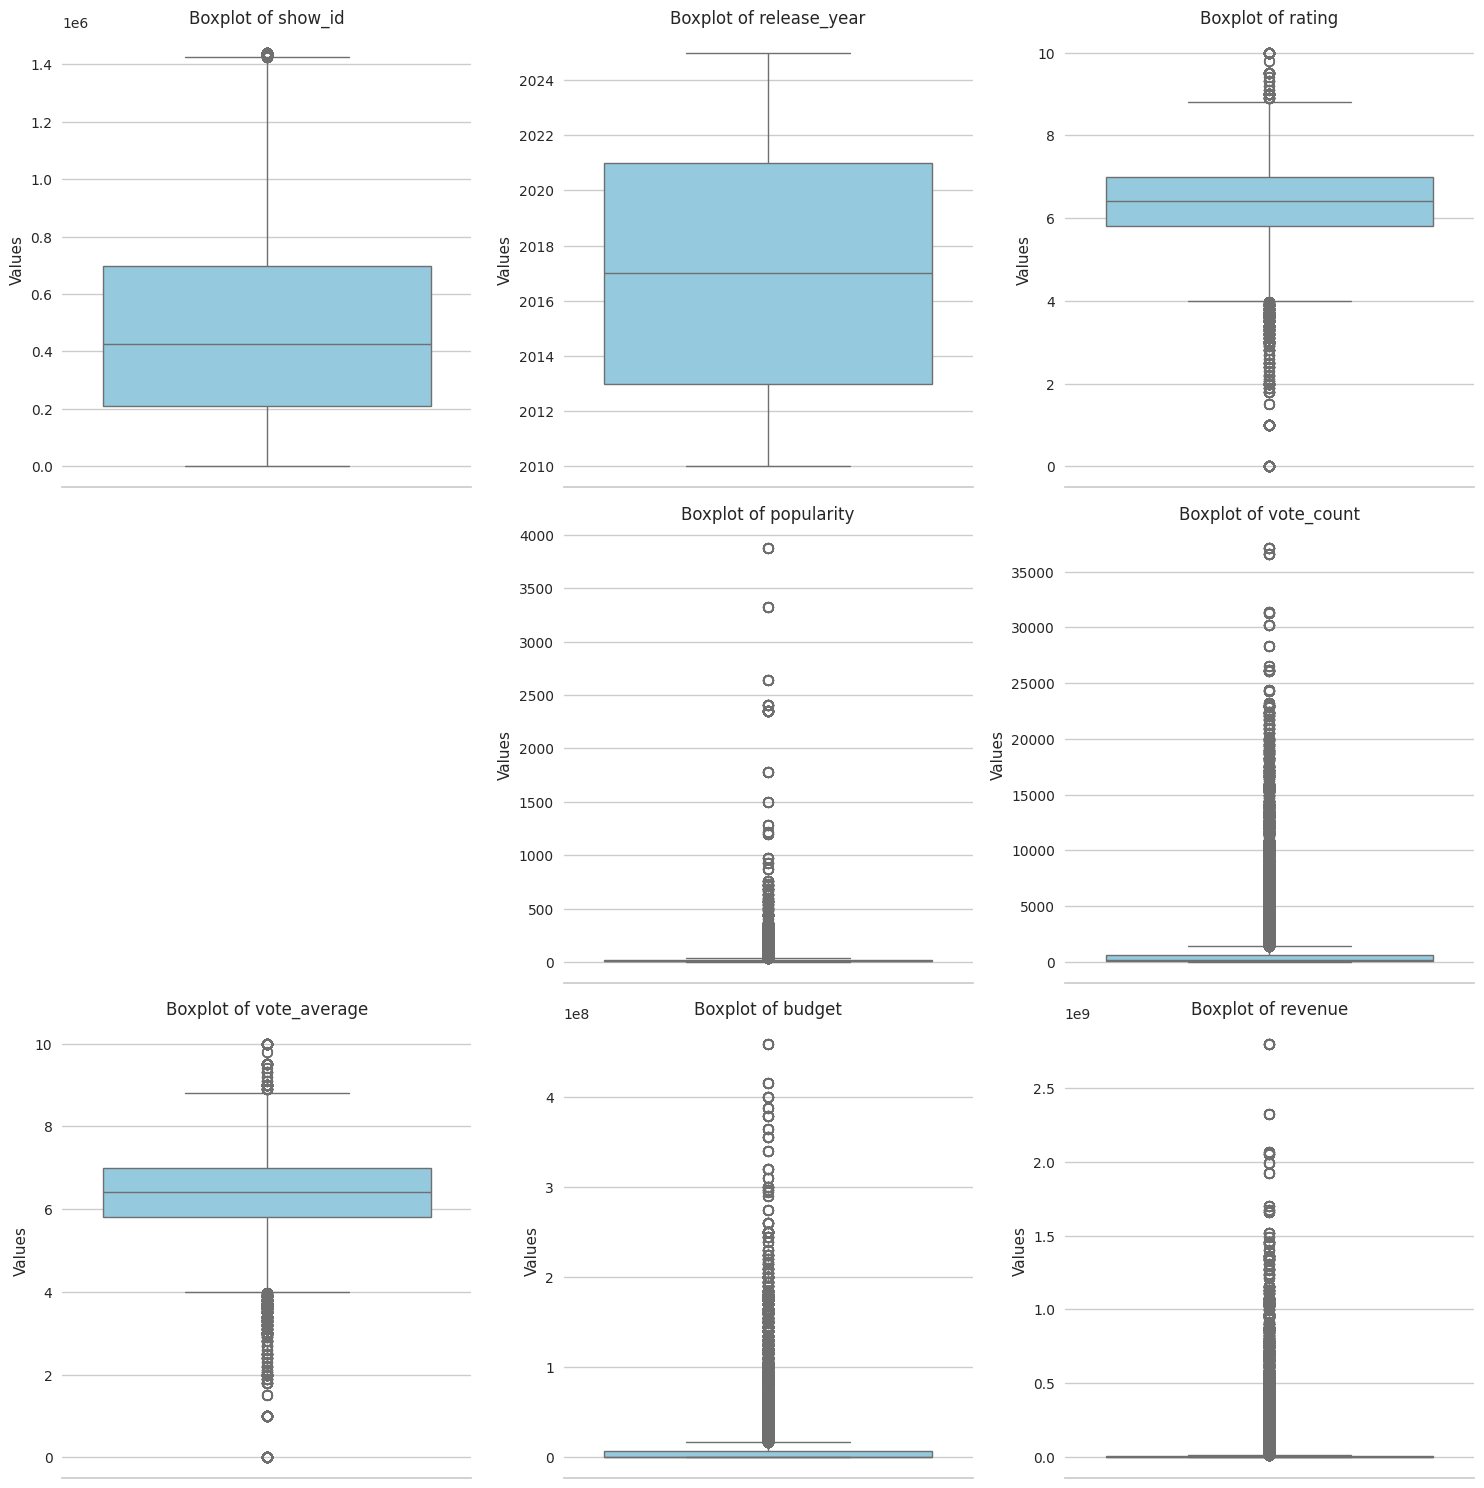

In [970]:
numeric_cols = df.select_dtypes(include=['number']).columns
def boxplot_numeric(df, numeric_cols):
  n_cols = 3
  n_rows = len(numeric_cols) // n_cols + 1

  plt.figure(figsize=(15, 5*n_rows))

  for i, col in enumerate(numeric_cols, 1):
      if not df[col].isna().all():
          plt.subplot(n_rows, n_cols, i)
          sns.boxplot(y=df[col], color='skyblue')
          plt.title(f'Boxplot of {col}', fontsize=12)
          plt.ylabel('Values')
          sns.despine(left=True)

  plt.tight_layout()
  plt.show()

boxplot_numeric(df, numeric_cols)

In [971]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,NaN,Comedy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867
0,10192,Movie,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,NaN,Adventure,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867
0,10192,Movie,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,NaN,Fantasy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867
0,10192,Movie,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,NaN,Animation,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867
0,10192,Movie,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,NaN,Family,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38,165000000,752600867


# Kesimpulan
Bisa dilihat bahwa dalam prosesnya data kurang berish hal ini dengan ditemukannya banyak oulier dan juga data duplikat dan data bersifat nan juga sehingga kita perlu melakukan pembersihan data yang baik untuk itu sebelaum melakuka pemodelan, selain itu kolom type dan duration harus dihapus karena type hanya memiliki 1 nilai dan duraton 100% nilainya adalah nan, dan untuk data kategorikal data cenderung merata dan tidak ada yang mendominasi kecual untuk kolom languenge

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

# Menagani msising value data duplikat

In [972]:
df.drop(columns=['type', 'duration'], inplace=True)

In [973]:
melakukan_eksplor(df)

<class 'pandas.core.frame.DataFrame'>
Index: 290152 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   show_id       290152 non-null  int64  
 1   title         290152 non-null  object 
 2   director      289472 non-null  object 
 3   cast          289779 non-null  object 
 4   country       286588 non-null  object 
 5   date_added    290152 non-null  object 
 6   release_year  290152 non-null  int64  
 7   rating        290152 non-null  float64
 8   genres        289874 non-null  object 
 9   language      290152 non-null  object 
 10  description   289394 non-null  object 
 11  popularity    290152 non-null  float64
 12  vote_count    290152 non-null  int64  
 13  vote_average  290152 non-null  float64
 14  budget        290152 non-null  int64  
 15  revenue       290152 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 37.6+ MB
Jumlah data duplikat: 18
Jumlah data NaN

In [974]:
df["budget"].value_counts()

,count
budget,
0,185129
20000000,4256
10000000,4132
5000000,3404
30000000,3245
...,...
45,2
117,2
84919,2


In [975]:
df.drop(columns=['budget'], inplace=True)


In [976]:
df["revenue"].value_counts()

,count
revenue,
0,161681
7171,1705
11000000,870
14400000,340
13285512,300
...,...
16661077,2
34823764,2
13842409,2


In [977]:
df.drop(columns=['revenue'], inplace=True)


In [978]:
df["director"].value_counts()

,count
director,
Toby Genkel,440
Sam Liu,425
Yorgos Lanthimos,375
Thomas Astruc,369
Ben Stassen,360
...,...
Silke De Vos,1
Lize Cuveele,1
Jelske Antonissen,1


In [979]:
df["director"].fillna(value="Yorgos Lanthimos", inplace=True)

<ipython-input-979-f515d81a134f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna(value="Yorgos Lanthimos", inplace=True)


In [980]:
df["cast"].value_counts()

,count
cast,
Julian Barratt,346
Ian Virgo,344
Miguel Ángel Muñoz,341
Eric Jacobus,341
Dana Meinrath,341
...,...
Kirill Käro,1
Josh Pence,1
Hariclia Grammenou,1


In [981]:
df["cast"].fillna(value="Julian Barratt", inplace=True)

<ipython-input-981-fd7378e3fbd6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cast"].fillna(value="Julian Barratt", inplace=True)


In [982]:
df["genres"].value_counts()

,count
genres,
Drama,53431
Comedy,32522
Thriller,29264
Action,24321
Horror,20459
Romance,17344
Adventure,15687
Animation,13561
Crime,12799


In [983]:
df["genres"].fillna(value="Drama", inplace=True)

<ipython-input-983-069aaccb2e22>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genres"].fillna(value="Drama", inplace=True)


In [984]:
df["description"].value_counts()

,count
description,
"Taking all that was great from the first instalment, the movie aims to be a wilder, leaner, faster-paced and even more entertaining anthology this time around, with a new crop of award-winning, visionary filmmakers from around the globe.",1705
The universe of the Halo video game series is expanded in seven short animated films from Japan's greatest anime directors and studios.,840
"Macross Delta is set in the year 2067, eight years after the events of Macross Frontier. The story focuses on Walküre, a team of talented idols and the Delta Squadron, a team of experienced Valkyrie pilots as they battle against the Var Syndrome, a mysterious phenomena that is consuming the galaxy, alongside the mysterious Aerial Knights Valkyrie fighter team of the Kingdom of Wind. This film recompiles scenes from the television anime with new scenes to tell a different story.",735
"Dante journeys through the nine circles of Hell -- limbo, lust, gluttony, greed, anger, heresy, violence, fraud and treachery -- in search of his true love, Beatrice. An animated version of the video game of the same name.",560
"A feature-length anthology film. They are known as myths, lore, and folktales. Created to give logic to mankind’s darkest fears, these stories laid the foundation for what we now know as the horror genre.",360
...,...
"John Connors invites his grandmother Chrissy Donohue Ward into the frame to share the myths and oral traditions that shaped her and inspired him as a filmmaker. A lifelong Mincéir activist and poet, Chrissy blends enchanting fairytales with raw truths, celebrating the Irish Traveller community’s resilience. A powerful exploration of storytelling’s enduring magic, this documentary invites audiences to embrace the overlooked beauty of Mincéir culture and its rich legacy of connection and belonging.",1
"A personal look at the life, work and untimely death of celebrated indie cinematographer Halyna Hutchins, who was shot and killed in a tragic accident on the set of the film Rust in 2021.",1
"The fascinating and little-known story of the secretarial profession, which tells the story of the evolution of women's work, between emancipation, invisibility and the glass ceiling.",1


In [985]:
df["description"].fillna(value="Taking all that was great from the first instalment, the movie aims to be a wilder, leaner, faster-paced and even more entertaining anthology this time around, with a new crop of award-winning, visionary filmmakers from around the globe.", inplace=True)

<ipython-input-985-0e91ae4cd088>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["description"].fillna(value="Taking all that was great from the first instalment, the movie aims to be a wilder, leaner, faster-paced and even more entertaining anthology this time around, with a new crop of award-winning, visionary filmmakers from around the globe.", inplace=True)


In [986]:
df.drop_duplicates(inplace=True)

In [987]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Comedy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Adventure,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Fantasy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Animation,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Family,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38


memodifikasi beberapa fitur

In [988]:
df['show_id'] = df['show_id'].astype(str)
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['release_year'].astype(str)

# Mengatasi Outlier

In [989]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Comedy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Adventure,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Fantasy,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Animation,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38
0,10192,Shrek Forever After,Mike Mitchell,Mike Myers,United States of America,2010-05-16,2010,6.38,Family,en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.38


In [990]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [991]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [992]:
condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_cols]

categorical_and_datetime_features = df.select_dtypes(include=['object', 'datetime64']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_and_datetime_features]], axis=1)


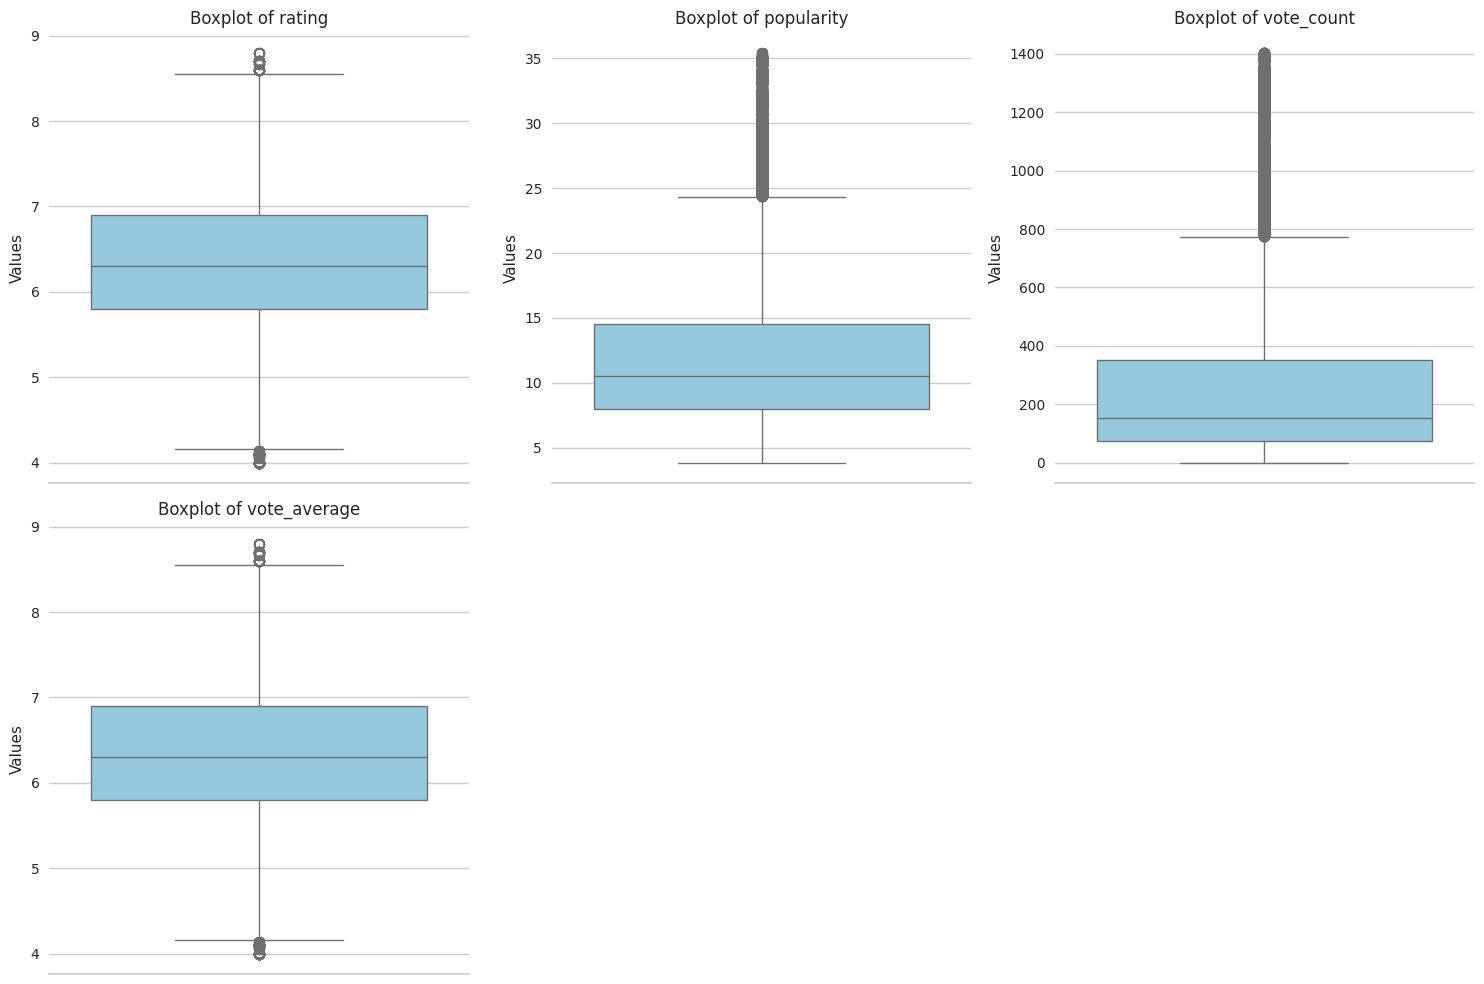

In [993]:
numeric_cols = df.select_dtypes(include=['number']).columns

boxplot_numeric(df, numeric_cols)

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223609 entries, 44 to 15991
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   rating        223609 non-null  float64       
 1   popularity    223609 non-null  float64       
 2   vote_count    223609 non-null  int64         
 3   vote_average  223609 non-null  float64       
 4   show_id       223609 non-null  object        
 5   title         223609 non-null  object        
 6   director      223609 non-null  object        
 7   cast          223609 non-null  object        
 8   country       221334 non-null  object        
 9   date_added    223609 non-null  datetime64[ns]
 10  release_year  223609 non-null  object        
 11  genres        223609 non-null  object        
 12  language      223609 non-null  object        
 13  description   223609 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 25.6+

In [995]:
# df["popularity"] = winsorize(df["popularity"], limits=[0.05, 0.05])
# df["revenue"] = winsorize(df["revenue"], limits=[0.3, 0.3])
# df["vote_count"] = winsorize(df["vote_count"], limits=[0.05, 0.05])
# df["budget"] = winsorize(df["budget"], limits=[0.3, 0.3])

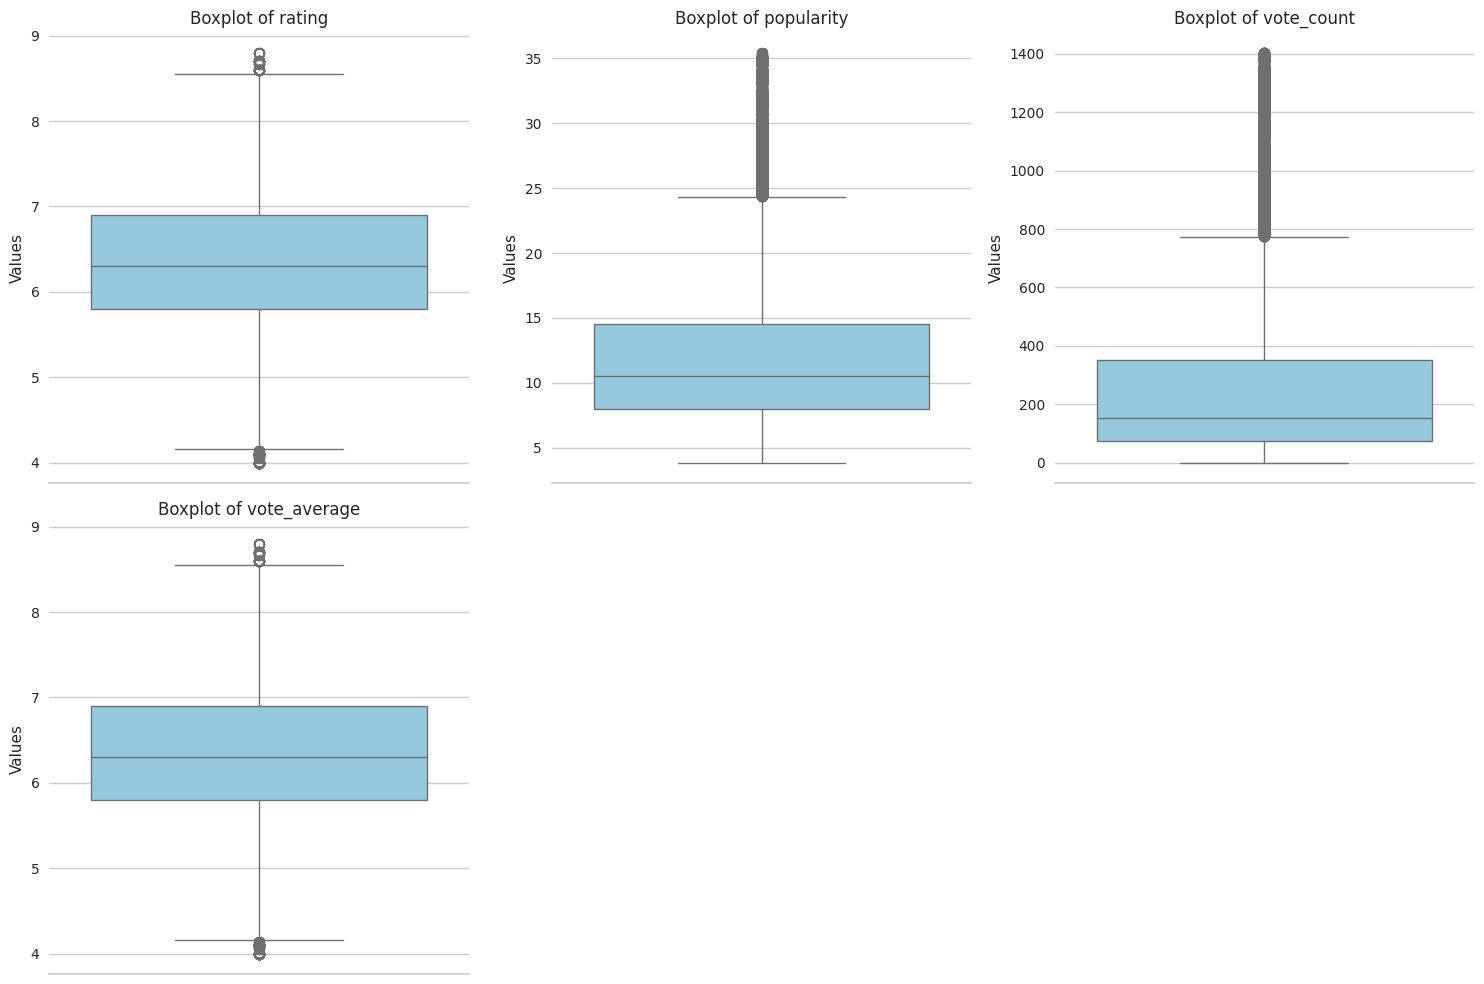

In [996]:
boxplot_numeric(df, numeric_cols)

In [997]:
df["popularity"].value_counts()

,count
popularity,
8.400,1705
8.494,745
16.793,560
8.177,375
5.248,360
...,...
7.766,1
5.472,1
6.393,1


In [998]:

df["vote_count"].value_counts()

,count
vote_count,
317,1770
7,1377
91,1242
107,1173
62,1152
...,...
1027,5
735,5
934,5


In [999]:
df["popularity"] = winsorize(df["popularity"], limits=[0.1, 0.1])
df["vote_count"] = winsorize(df["vote_count"], limits=[0.1, 0.1])

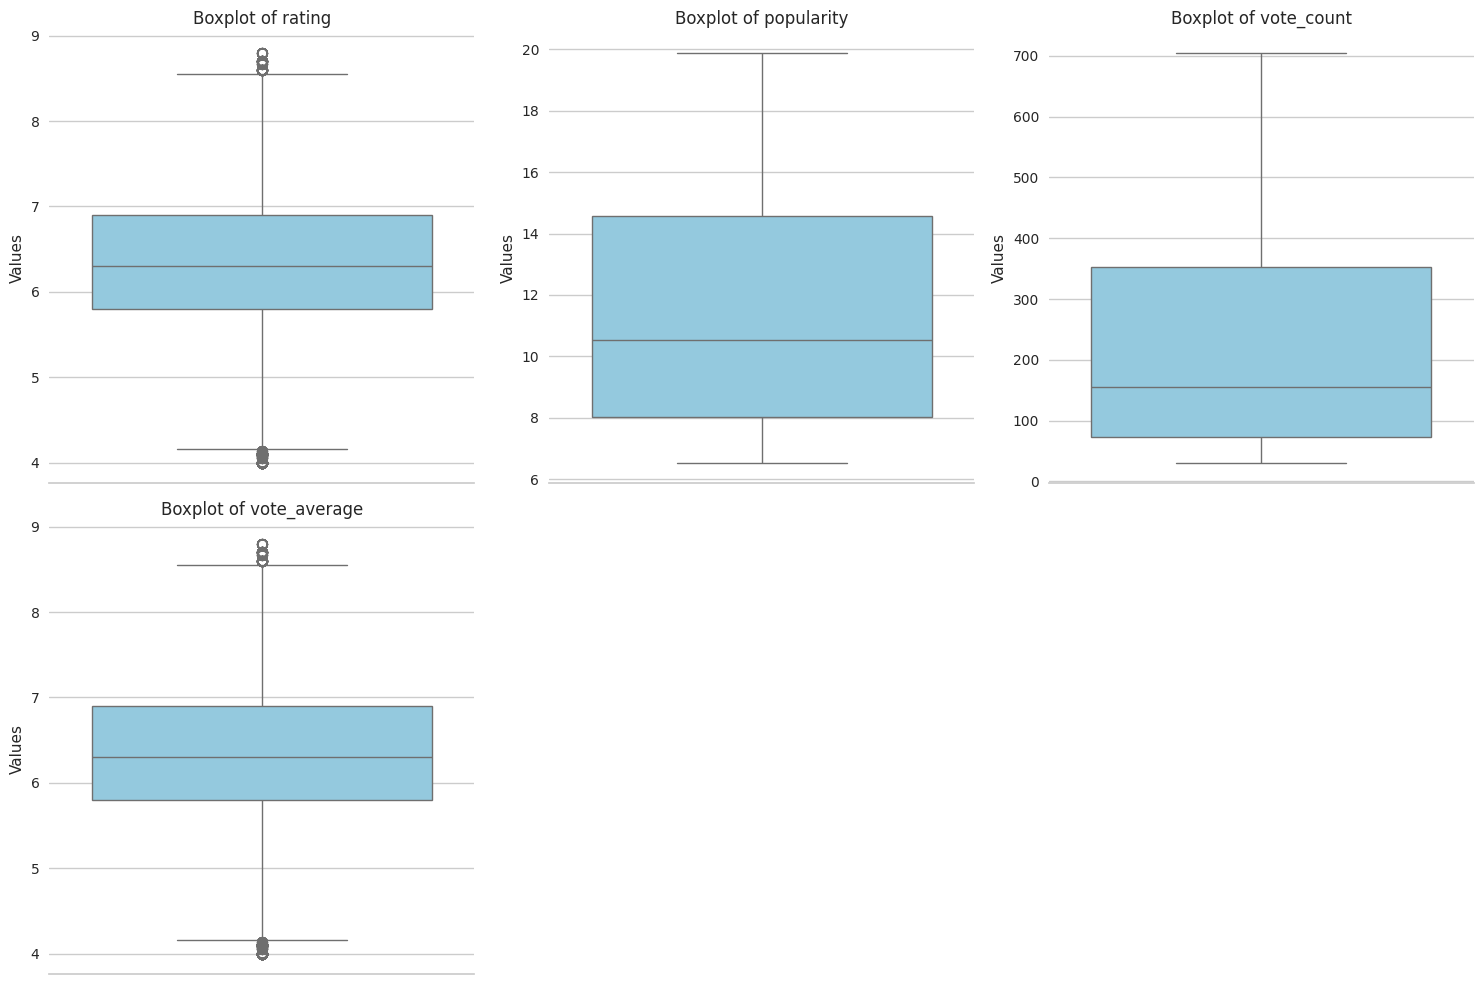

In [1000]:
boxplot_numeric(df, numeric_cols)

In [1001]:
df.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,rating,popularity,vote_count,vote_average,date_added
count,223609.000000,223609.000000,223609.000000,223609.000000,223609
mean,6.321108,11.661769,243.852855,6.321108,2017-06-18 07:20:22.034891264
min,4.000000,6.546000,31.000000,4.000000,2010-01-01 00:00:00
25%,5.800000,8.019000,73.000000,5.800000,2013-10-18 00:00:00
50%,6.300000,10.543000,155.000000,6.300000,2017-07-26 00:00:00
75%,6.900000,14.554000,353.000000,6.900000,2021-02-12 00:00:00
max,8.800000,19.881000,705.000000,8.800000,2025-03-07 00:00:00
std,0.846057,4.315645,220.512116,0.846057,NaN


melakukan pembersihan oulier sekali lagi karena masih banyak data yang tidak normal

# Normalisasi Data

In [1002]:
df_final = df.copy()

In [1003]:
numeric_cols = df_final.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_final[numeric_cols] = scaler.fit_transform(df_final[numeric_cols])
df_final.head()

,rating,popularity,vote_count,vote_average,show_id,title,director,cast,country,date_added,release_year,genres,language,description
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Action,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Thriller,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Romance,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Adventure,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Marie Westbrook,United States of America,2010-08-07,2010,Action,en,On the 100th anniversary of the original voyag...


# Melakukan Encoding

In [1004]:
df_final["country"].nunique()

127

In [1005]:
df_final.head()

,rating,popularity,vote_count,vote_average,show_id,title,director,cast,country,date_added,release_year,genres,language,description
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Action,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Thriller,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Romance,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Shane van Dyke,United States of America,2010-08-07,2010,Adventure,en,On the 100th anniversary of the original voyag...
44,0.208333,1.0,0.583086,0.208333,44918,Titanic II,Shane van Dyke,Marie Westbrook,United States of America,2010-08-07,2010,Action,en,On the 100th anniversary of the original voyag...


In [1006]:
category_features =["release_year","country","genres", "language", 'director', 'cast', "title"]
label_encoder = LabelEncoder()
df_final = pd.DataFrame(df)

for col in category_features:
    df_final[col] = label_encoder.fit_transform(df[col])

In [1007]:
df_final.head()

,rating,popularity,vote_count,vote_average,show_id,title,director,cast,country,date_added,release_year,genres,language,description
44,5.0,19.881,424,5.0,44918,11013,7298,25923,120,2010-08-07,0,0,10,On the 100th anniversary of the original voyag...
44,5.0,19.881,424,5.0,44918,11013,7298,25923,120,2010-08-07,0,16,10,On the 100th anniversary of the original voyag...
44,5.0,19.881,424,5.0,44918,11013,7298,25923,120,2010-08-07,0,13,10,On the 100th anniversary of the original voyag...
44,5.0,19.881,424,5.0,44918,11013,7298,25923,120,2010-08-07,0,1,10,On the 100th anniversary of the original voyag...
44,5.0,19.881,424,5.0,44918,11013,7298,18604,120,2010-08-07,0,0,10,On the 100th anniversary of the original voyag...


In [1008]:
df_final = df_final.groupby(['show_id', 'title'], as_index=False).agg({
    'cast': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'director': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'genres': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'country': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'popularity': 'first',
    'vote_count': 'first',
    'vote_average': 'first',
    'release_year': 'first',
    'rating': 'first'
})

In [1009]:
df = df.groupby(['show_id', 'title'], as_index=False).agg({
    'cast': lambda x: ', '.join(str(v) for v in set(x) if pd.notna(v)),
    'director': lambda x: ', '.join(str(v) for v in set(x) if pd.notna(v)),
    'genres': lambda x: ', '.join(str(v) for v in set(x) if pd.notna(v)),
    'country': lambda x: ', '.join(str(v) for v in set(x) if pd.notna(v)),
    'popularity': 'first',
    'vote_count': 'first',
    'vote_average': 'first',
    'release_year': 'first',
    'rating': 'first'
})

In [1010]:
df_final.head()

,show_id,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating
0,1000081,8046,79583.0,5023.0,7.0,40.0,15.864,263,5.2,13,5.2
1,1000173,6584,105958.0,5831.0,26.0,12.0,19.881,31,6.5,13,6.5
2,1000194,1214,97302.0,5474.0,5.0,4.0,9.153,60,6.6,12,6.6
3,100024,1637,115096.0,2386.0,26.0,141.0,6.546,35,5.4,2,5.4
4,100046,9581,82284.0,4805.0,22.0,127.0,7.822,150,6.5,2,6.5


In [1011]:
df_final.describe()

,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating
count,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000,12311.000000
mean,6001.911867,75350.981236,4878.388189,17.448948,113.645764,11.197526,214.777922,6.284737,6.905857,6.284737
std,3456.152958,22160.599425,3963.520448,10.721281,66.825848,4.272589,207.797350,0.882648,4.302531,0.882648
min,0.000000,623.000000,0.000000,0.000000,4.000000,6.546000,31.000000,4.000000,0.000000,4.000000
25%,3011.500000,61056.000000,2394.000000,9.000000,57.000000,7.598500,62.000000,5.700000,3.000000,5.700000
50%,6010.000000,75683.000000,4703.000000,16.000000,120.000000,9.966000,129.000000,6.300000,7.000000,6.300000
75%,8997.000000,90455.000000,6859.500000,24.000000,120.000000,13.831500,293.000000,6.900000,11.000000,6.900000
max,11984.000000,148535.000000,134493.000000,66.000000,1047.000000,19.881000,705.000000,8.800000,15.000000,8.800000


In [1012]:
melakukan_eksplor(df_final)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12311 entries, 0 to 12310
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       12311 non-null  object 
 1   title         12311 non-null  int64  
 2   cast          12311 non-null  float64
 3   director      12311 non-null  float64
 4   genres        12311 non-null  float64
 5   country       12311 non-null  float64
 6   popularity    12311 non-null  float64
 7   vote_count    12311 non-null  int64  
 8   vote_average  12311 non-null  float64
 9   release_year  12311 non-null  int64  
 10  rating        12311 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.0+ MB
Jumlah data duplikat: 0
Jumlah data NaN: 0
 aman


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

saya memilih k-means karena saya tidak bisa menentukan jumlah claster yang cocok dan juga jumlah data yang cendderung banyak akan sangat cocok saya rasa dengan ini

In [1013]:
k = 3
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')

df_final["Cluster"] = hc.fit_predict(df_numeric)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1014]:
df_numeric = df_final.select_dtypes(include=[np.number])
df_numeric = df_numeric.to_numpy()

In [1015]:
df_final.head()

,show_id,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating,Cluster
0,1000081,8046,79583.0,5023.0,7.0,40.0,15.864,263,5.2,13,5.2,2
1,1000173,6584,105958.0,5831.0,26.0,12.0,19.881,31,6.5,13,6.5,0
2,1000194,1214,97302.0,5474.0,5.0,4.0,9.153,60,6.6,12,6.6,0
3,100024,1637,115096.0,2386.0,26.0,141.0,6.546,35,5.4,2,5.4,0
4,100046,9581,82284.0,4805.0,22.0,127.0,7.822,150,6.5,2,6.5,2


In [1016]:
f_numeric = df_final.select_dtypes(include=[np.number]).drop(columns=["Cluster"]).to_numpy()

silhouette_avg = silhouette_score(df_numeric, df_final["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4344003655044108


hal ini menunjukan bahwa cluter cukup terpisaj dengan baik namun masih agak kurang karena nilai yang di anggap layak adalah 0.5

In [1017]:
wcss = kmeans.inertia_
print(f"WCSS (Within-Cluster Sum of Squares): {wcss}")

WCSS (Within-Cluster Sum of Squares): 129.55910864095944


Nilai ini sudah cukup rendah dibandingkan WCSS untuk
𝑘
=
1
k=1 atau
𝑘
=
2
k=2, yang berarti cluster mulai stabil pada
𝑘
=
3
k=3.

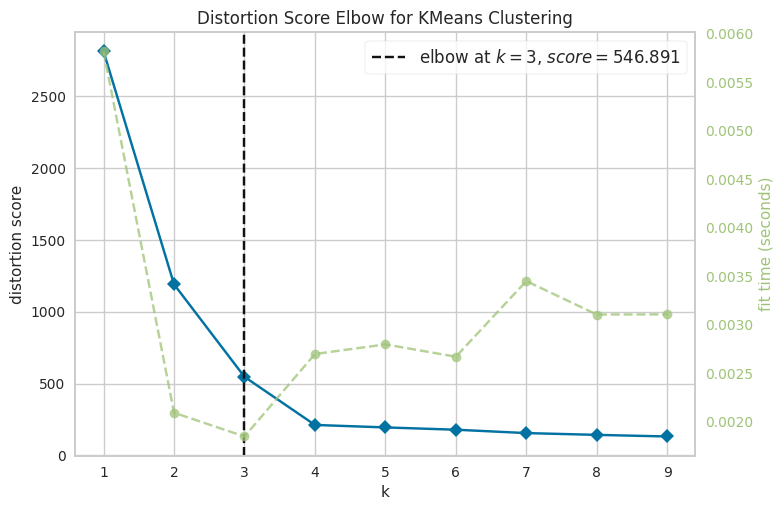

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1018]:

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

hal ini menunjukan bahwa dalam perkembanagn menambahkan nilai klaster yang lebih dari tiga tidak akan menunjukana pengaruh yang signifikan

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

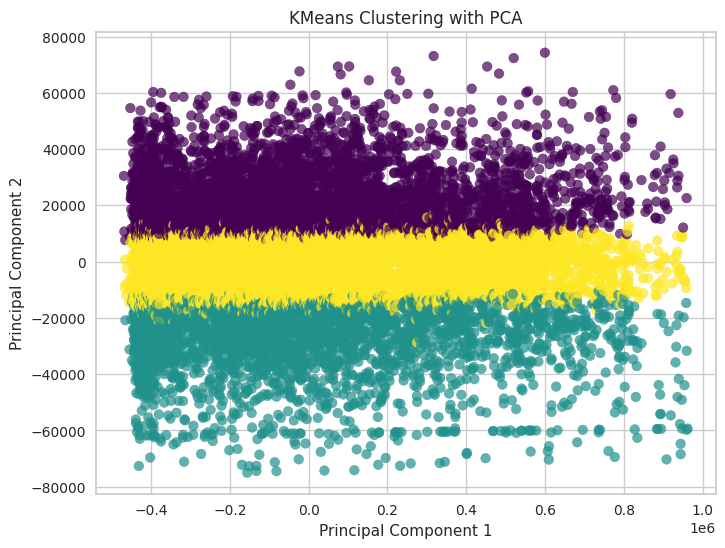

In [1019]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_final.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_final['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.show()

data di atas menunjukan bahwa data agak sedikit terlalu vertikal yang menunjukan bahwa data kurang tercluster secara alaami

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target dan Kembalikan seperti semual dataset sebelum di cluster

In [1020]:
df_final['Cluster'] = hc.labels_

In [1021]:
df.head()

,show_id,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating
0,1000081,Sentinelle,"Jonathan Cohen, Ramzy Bedia, Raphaël Quenard, ...","Hugo Benamozig, David Caviglioli","Comedy, Crime, Action",France,15.864,263,5.2,2023,5.2
1,1000173,Nightman,"Eoin Duffy, Maeve Leonard, Áine Ní Laoghaire, ...",Mélanie Delloye-Betancourt,"Thriller, Horror",Belgium,19.881,31,6.5,2023,6.5
2,1000194,Bank Robbers: The Last Great Heist,"Sebastián García Bolster, Luis Mario Vitette, ...",Matías Gueilburt,Documentary,Argentina,9.153,60,6.6,2022,6.6
3,100024,Bloodwork,"Travis Van Winkle, Rik Young, Tricia Helfer, M...",Eric Wostenberg,"Horror, Thriller","United States of America, Canada",6.546,35,5.4,2012,5.4
4,100046,The Giant Mechanical Man,"Malin Åkerman, Jenna Fischer, Topher Grace, Ch...",Lee Kirk,"Comedy, Drama, Romance",,7.822,150,6.5,2012,6.5


In [1022]:
df = df.merge(df_final[["show_id", "Cluster"]], on="show_id", how="left")


In [1023]:
df.head()

,show_id,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating,Cluster
0,1000081,Sentinelle,"Jonathan Cohen, Ramzy Bedia, Raphaël Quenard, ...","Hugo Benamozig, David Caviglioli","Comedy, Crime, Action",France,15.864,263,5.2,2023,5.2,2
1,1000173,Nightman,"Eoin Duffy, Maeve Leonard, Áine Ní Laoghaire, ...",Mélanie Delloye-Betancourt,"Thriller, Horror",Belgium,19.881,31,6.5,2023,6.5,0
2,1000194,Bank Robbers: The Last Great Heist,"Sebastián García Bolster, Luis Mario Vitette, ...",Matías Gueilburt,Documentary,Argentina,9.153,60,6.6,2022,6.6,0
3,100024,Bloodwork,"Travis Van Winkle, Rik Young, Tricia Helfer, M...",Eric Wostenberg,"Horror, Thriller","United States of America, Canada",6.546,35,5.4,2012,5.4,0
4,100046,The Giant Mechanical Man,"Malin Åkerman, Jenna Fischer, Topher Grace, Ch...",Lee Kirk,"Comedy, Drama, Romance",,7.822,150,6.5,2012,6.5,2


# Analisis

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

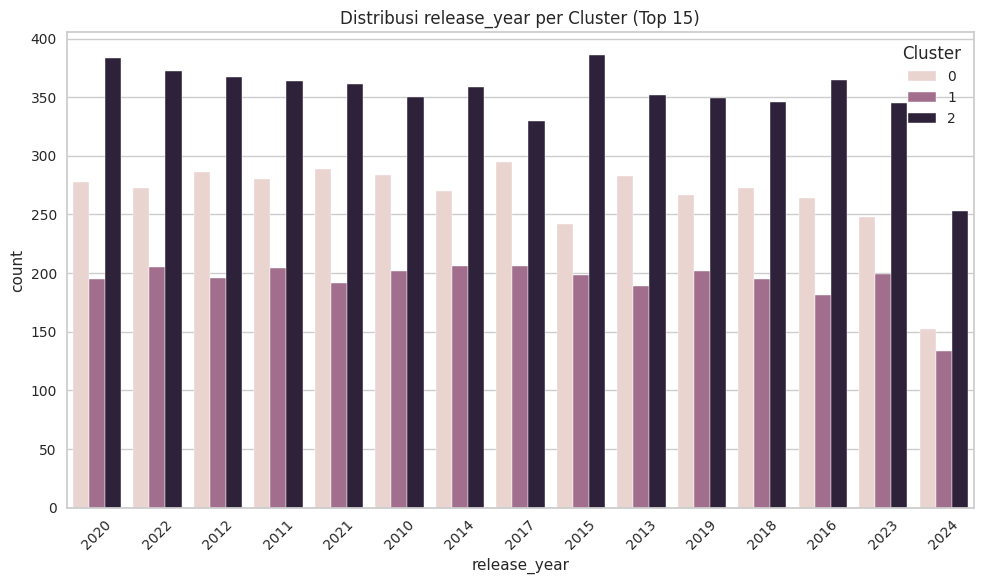

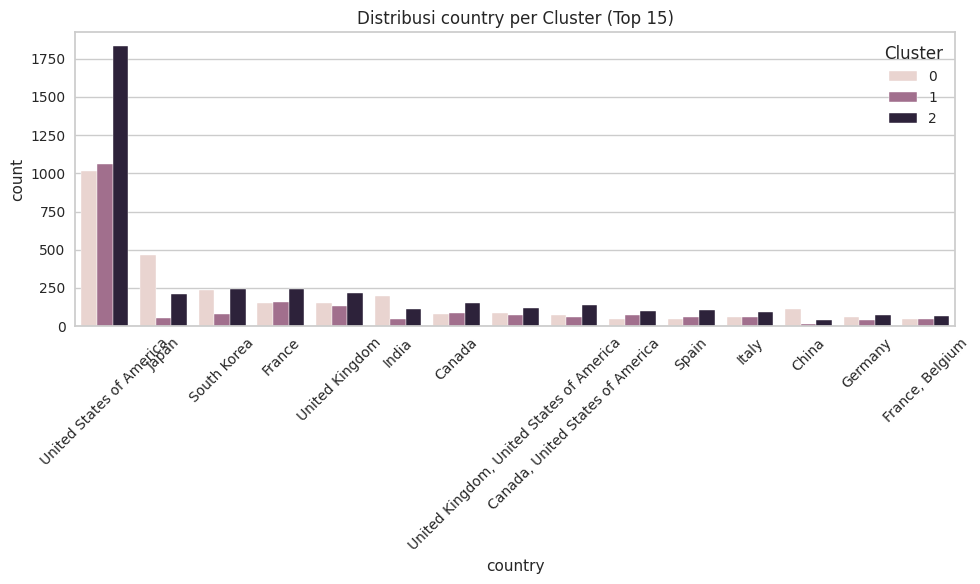

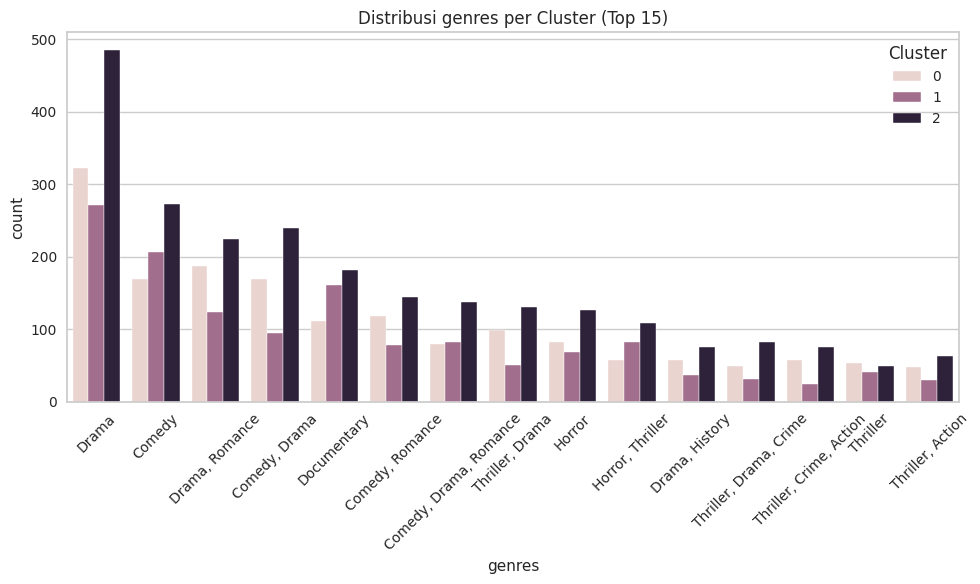

In [1024]:
category_features = ["release_year", "country", "genres"]

for col in category_features:
    plt.figure(figsize=(10, 6))

    top_15 = df[col].value_counts().nlargest(15).index

    filtered_df = df[df[col].isin(top_15)]


    sns.countplot(data=filtered_df, x=col, hue='Cluster', order=top_15)
    plt.title(f'Distribusi {col} per Cluster (Top 15)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [1025]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster} - Statistik Deskriptif:")
    cluster_data = df[df['Cluster'] == cluster].select_dtypes(include=['number'])
    print(cluster_data.describe())

    # Anda juga bisa menambahkan analisis tambahan seperti:
    print(f"\nUkuran Cluster {cluster}: {len(cluster_data)}")
    print(f"Proporsi: {len(cluster_data)/len(df):.2%}")


Cluster 0 - Statistik Deskriptif:
        popularity   vote_count  vote_average       rating  Cluster
count  4030.000000  4030.000000   4030.000000  4030.000000   4030.0
mean     11.294997   204.351613      6.361141     6.361141      0.0
std       4.305007   202.651094      0.873535     0.873535      0.0
min       6.546000    31.000000      4.000000     4.000000      0.0
25%       7.650250    57.000000      5.800000     5.800000      0.0
50%      10.013500   120.000000      6.400000     6.400000      0.0
75%      14.018500   273.000000      7.000000     7.000000      0.0
max      19.881000   705.000000      8.800000     8.800000      0.0

Ukuran Cluster 0: 4030
Proporsi: 32.73%

Cluster 1 - Statistik Deskriptif:
        popularity   vote_count  vote_average       rating  Cluster
count  2946.000000  2946.000000   2946.000000  2946.000000   2946.0
mean     10.964502   215.491853      6.248393     6.248393      1.0
std       4.221549   207.272921      0.905443     0.905443      0.0
min  

Berikut adalah analisis terbaru berdasarkan data numerik yang telah diperbarui:  

---

## **Cluster 0: Popularitas Sedang dengan Rating Lebih Tinggi**  
- **Statistik Numerik:**  
  - Rata-rata Popularity: **11.29**  
  - Rata-rata Vote Count: **204**  
  - Rata-rata Vote Average: **6.36**  
  - Rata-rata Rating: **6.36**  
  - Ukuran Cluster: **4030 (32.73%)**  
- **Distribusi Negara:**  
  - Amerika Serikat masih menjadi penyumbang utama dalam cluster ini.  
  - Jepang juga memiliki jumlah entitas yang signifikan.  
  - Negara-negara lain seperti Korea Selatan, Prancis, dan Inggris juga berkontribusi secara merata.  
- **Analisis:**  
  Cluster ini mencakup item dengan popularitas sedang tetapi memiliki **rating rata-rata yang lebih tinggi** dibandingkan cluster lain (**6.36**). Dengan jumlah vote count yang cukup besar (**204 vote**), item dalam cluster ini cukup dikenal tetapi tidak termasuk yang paling populer. Dari segi distribusi negara, cluster ini lebih merata dibandingkan cluster lainnya.

---

## **Cluster 1: Popularitas Lebih Rendah dengan Rating yang Sedikit di Bawah Cluster 0**  
- **Statistik Numerik:**  
  - Rata-rata Popularity: **10.96**  
  - Rata-rata Vote Count: **215**  
  - Rata-rata Vote Average: **6.25**  
  - Rata-rata Rating: **6.25**  
  - Ukuran Cluster: **2946 (23.93%)**  
- **Distribusi Negara:**  
  - Amerika Serikat masih mendominasi tetapi dalam jumlah yang lebih kecil dibandingkan Cluster 2.  
  - Jepang dan Korea Selatan juga berkontribusi dalam cluster ini, tetapi dalam jumlah lebih kecil dibandingkan Cluster 0.  
- **Analisis:**  
  Cluster ini berisi item dengan **popularitas sedikit lebih rendah** dibandingkan Cluster 0, namun dengan **vote count lebih tinggi** (**215 vote rata-rata**). Rating rata-rata (**6.25**) sedikit lebih rendah dibandingkan Cluster 0, menunjukkan bahwa konten dalam cluster ini mungkin memiliki daya tarik yang lebih niche atau spesifik.  

---

## **Cluster 2: Popularitas Tinggi dengan Dominasi Amerika Serikat**  
- **Statistik Numerik:**  
  - Rata-rata Popularity: **11.25**  
  - Rata-rata Vote Count: **222**  
  - Rata-rata Vote Average: **6.25**  
  - Rata-rata Rating: **6.25**  
  - Ukuran Cluster: **5335 (43.34%)**  
- **Distribusi Negara:**  
  - **Amerika Serikat mendominasi cluster ini** dengan jumlah entitas yang jauh lebih tinggi dibandingkan negara lain.  
  - Jepang tetap menjadi negara dengan kontribusi besar, tetapi jauh lebih kecil dibandingkan Amerika Serikat.  
  - Negara-negara seperti Korea Selatan, Inggris, Prancis, dan Kanada juga memiliki jumlah entitas yang signifikan.  
- **Analisis:**  
  Cluster ini merupakan **kelompok terbesar dalam dataset** dengan ukuran **43.34% dari total data**. Item dalam cluster ini memiliki **vote count tertinggi** (**222 vote rata-rata**) dan **popularitas yang cukup tinggi** (**11.25**), meskipun rating rata-ratanya tetap di **6.25**, mirip dengan Cluster 1. Dominasi Amerika Serikat dalam cluster ini menunjukkan bahwa banyak item populer berasal dari industri hiburan atau media Amerika.  

---

### **Kesimpulan Umum**  
1. **Cluster 2 memiliki popularitas tertinggi**, dengan jumlah vote count terbesar dan dominasi Amerika Serikat dalam distribusinya.  
2. **Cluster 0 memiliki rating tertinggi**, dengan distribusi negara yang lebih merata.  
3. **Cluster 1 adalah yang paling kecil**, dengan popularitas sedikit lebih rendah tetapi vote count lebih tinggi dibandingkan Cluster 0.  

Dari analisis ini, **Amerika Serikat tetap menjadi kontributor utama dalam dataset**, sementara Jepang dan negara-negara lain memiliki keterwakilan yang lebih bervariasi di masing-masing cluster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1026]:
df.to_csv('hasil_clutering.csv', index=False)